# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
from api_keys import api_key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start counter 
record = 1

print(f"Connecting to OpenWeatherMap API")
print(f"===================================")

# Loop through all cities in the list
for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Add to counter
        record= record + 1
        
        # API rate limit
        time.sleep(1.01)
        
    # Skip if no match found
    except:
        print("No match found. Skipping to next city.")
    continue

Connecting to OpenWeatherMap API
Processing Record 1 | Vryburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=vryburg
Processing Record 2 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=albany
Processing Record 3 | Westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=westport
Processing Record 4 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=severo-kurilsk
Processing Record 5 | Ornskoldsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=ornskoldsvik
Processing Record 6 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=busselton
Processing Record 7 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imper

No match found. Skipping to next city.
Processing Record 57 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=avarua
No match found. Skipping to next city.
Processing Record 58 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=mataura
Processing Record 59 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=bredasdorp
Processing Record 60 | Swan River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=swan river
Processing Record 61 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=tuktoyaktuk
Processing Record 62 | Cururupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=cururupu
Processing Record 63 | Waipawa
http://api.openweat

Processing Record 113 | Ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=ayan
Processing Record 114 | Coihueco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=coihueco
Processing Record 115 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=saint george
Processing Record 116 | Nosy Varika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=nosy varika
Processing Record 117 | Tororo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=tororo
Processing Record 118 | Husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=husavik
No match found. Skipping to next city.
Processing Record 119 | Raahe
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 168 | Benguela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=benguela
Processing Record 169 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=guerrero negro
Processing Record 170 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=saskylakh
Processing Record 171 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=katsuura
Processing Record 172 | Izhma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=izhma
Processing Record 173 | Ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=ahipara
Processing Record 174 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf1299644111

Processing Record 224 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=port lincoln
Processing Record 225 | Zlobin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=zlobin
Processing Record 226 | Lazaro Cardenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=lazaro cardenas
No match found. Skipping to next city.
Processing Record 227 | Russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=russell
Processing Record 228 | Arroyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=arroyo
No match found. Skipping to next city.
No match found. Skipping to next city.
No match found. Skipping to next city.
Processing Record 229 | Vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf1

Processing Record 279 | Mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=mayo
Processing Record 280 | Aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=aykhal
Processing Record 281 | Rwamagana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=rwamagana
No match found. Skipping to next city.
Processing Record 282 | Jasper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=jasper
Processing Record 283 | Narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=narsaq
Processing Record 284 | Chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=chapais
Processing Record 285 | Cidahu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf12996

Processing Record 335 | Great Falls
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=great falls
Processing Record 336 | Isla Mujeres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=isla mujeres
Processing Record 337 | Nanpiao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=nanpiao
Processing Record 338 | Puerto Escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=puerto escondido
Processing Record 339 | Altamirano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=altamirano
Processing Record 340 | Meridian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=meridian
Processing Record 341 | Liku
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2

Processing Record 390 | Poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=poum
Processing Record 391 | Dicabisagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=dicabisagan
Processing Record 392 | Hailey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=hailey
Processing Record 393 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=bambous virieux
Processing Record 394 | Chipinge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=chipinge
Processing Record 395 | Portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=portland
Processing Record 396 | Nurota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd65

Processing Record 446 | Amravati
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=amravati
Processing Record 447 | Neiafu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=neiafu
Processing Record 448 | Aketi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=aketi
Processing Record 449 | Podgorica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=podgorica
Processing Record 450 | Parfenyevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=parfenyevo
No match found. Skipping to next city.
Processing Record 451 | Bangassou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=bangassou
No match found. Skipping to next city.
Processing Record 452 | Turbat
http://api.openweatherm

Processing Record 500 | Eregli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=eregli
Processing Record 501 | Maniitsoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=maniitsoq
Processing Record 502 | Chicama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=chicama
Processing Record 503 | Texarkana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=texarkana
Processing Record 504 | Batemans Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=batemans bay
Processing Record 505 | At-Bashi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=at-bashi
Processing Record 506 | Awjilah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653

Processing Record 555 | Sao Luis de Montes Belos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2a280bf129964411189bd653a77d0ef1&q=sao luis de montes belos


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
weatherpy_dictionary = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create df 
weather_df = pd.DataFrame(weatherpy_dictionary)

# Display count

weather_df.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [18]:
weather_df.to_csv(output_data_file)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vryburg,23,ZA,1561588378,77,-26.96,24.73,51.71,18.19
1,Albany,75,US,1561588081,45,42.65,-73.75,86.00,10.29
2,Westport,3,US,1561588381,45,41.14,-73.36,88.00,3.29
3,Severo-Kurilsk,100,RU,1561588382,97,50.68,156.12,41.09,14.92
4,Ornskoldsvik,63,SE,1561588199,54,63.29,18.72,55.40,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

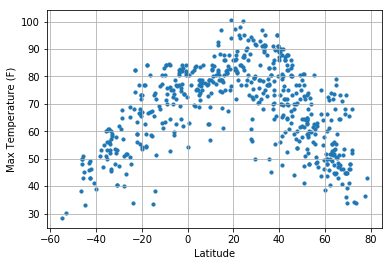

In [26]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=10)
plt.title=("City Latitude vs. Max Temperature (08/22/18")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('Temp_perLat.png')
plt.show()

#### Latitude vs. Humidity Plot

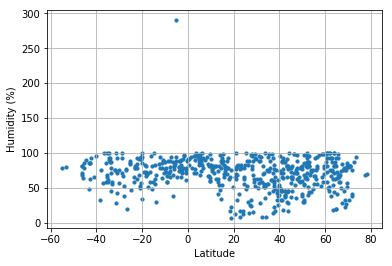

In [31]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)
plt.title=("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidity_v_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

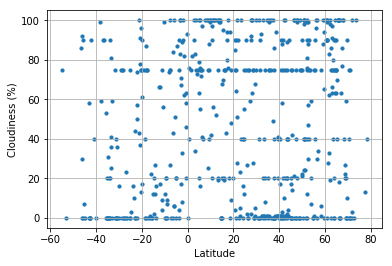

In [32]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)
plt.title=("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness_v_Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

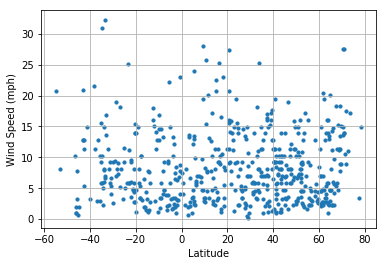

In [33]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)
plt.title=("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("WindSpeed_v_Latitude.png")
plt.show()